# Exploratory Data Analysis (EDA)

**🔄 EDA Workflow for Classification**

- 🔍 Data Snapshot Use df.head(), .info(), .describe() to check basic structure, types, and nulls. ➤ GeeksforGeeks – EDA Steps
- 🎯 Target Check Run y.value_counts() to verify class labels and spot imbalance.
- 🧩 Variable Typing Confirm feature types: numerical, categorical, text, date. Use the type-detection script from Milestone 3 Lesson 1.
- 📊 Univariate Exploration
  - Numeric: Histograms or KDE plots
  - Categorical: Countplots ➤ Seaborn Distribution Plots
- 🧪 Bivariate Exploration
  - Box/violin plots for numeric features across classes
  - Stacked bar plots for categorical vs. target
- 🔥 Correlation Heatmap Use Spearman (for ranking) or Pearson (for linear) correlations to detect redundant numeric features.
- 🔀 Multivariate Preview Use pair-plots or dimensionality reduction (e.g. t-SNE, PCA) to explore high-dimensional patterns.
- ⚖️ Class Balance Visualization Plot class proportions side-by-side to detect severe imbalance.
- ❗ Missing & Outlier Maps
  - Heatmaps for missing values
  - Scatterplots with Isolation Forest to highlight outliers

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv("../data/interim/cleaned_yield_tables.csv")

target_variable = "tree_type"
features = [
    "yield_class",
    "age",
    "average_height",
    "dbh",
    "taper",
    "trees_per_ha",
    "basal_area",
]

df.head()

ModuleNotFoundError: No module named 'pkg_resources'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4025 entries, 0 to 4024
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tree_type       4025 non-null   object 
 1   yield_class     4025 non-null   float64
 2   age             4025 non-null   float64
 3   average_height  4025 non-null   float64
 4   dbh             4025 non-null   float64
 5   taper           4025 non-null   float64
 6   trees_per_ha    4025 non-null   float64
 7   basal_area      4025 non-null   float64
dtypes: float64(7), object(1)
memory usage: 251.7+ KB


In [ ]:
df[target_variable].value_counts()

tree_type
coniferous    3242
deciduous      783
Name: count, dtype: int64

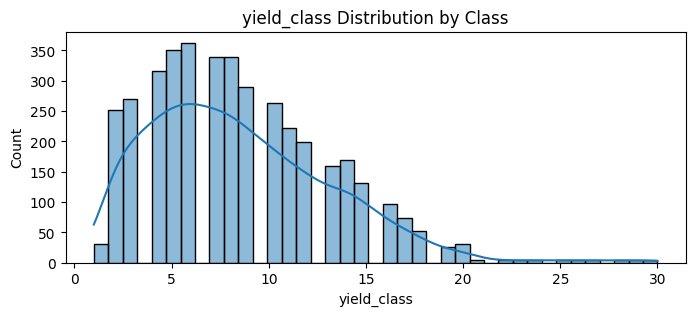

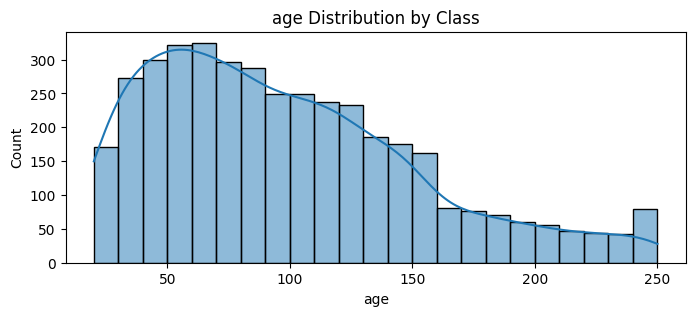

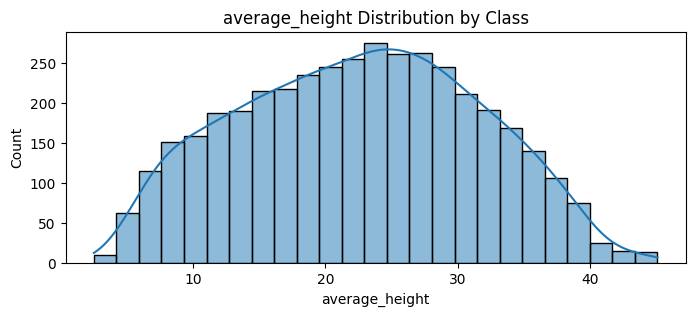

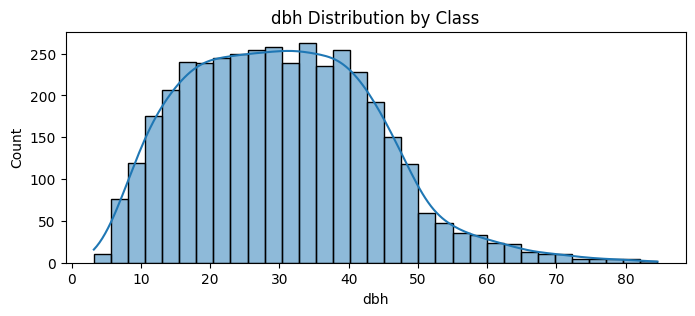

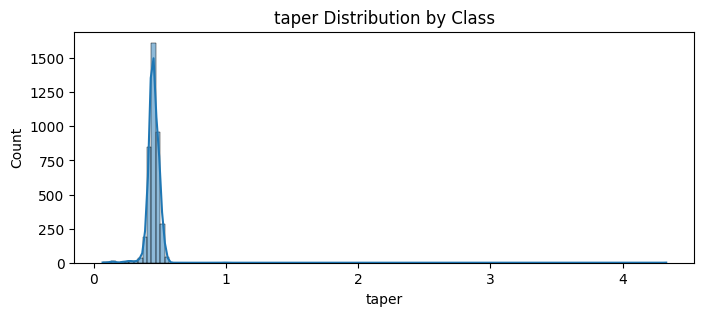

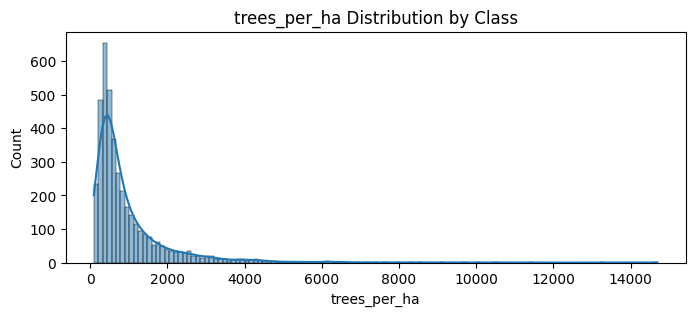

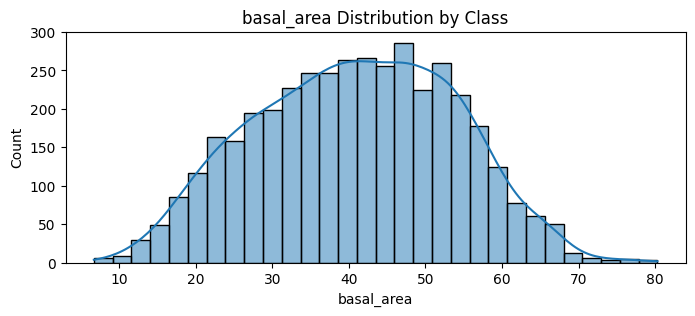

In [ ]:
for feature in features:
    plt.figure(figsize=(8, 3))
    sns.histplot(df[feature], kde=True, multiple='stack')
    plt.title(f'{feature} Distribution by Class')
    plt.show()

In [ ]:
for feature in features:
    ct = pd.crosstab(df[feature], df[target_variable])
    chi2, p, *_ = chi2_contingency(ct)
    print(f'Chi-square of {feature} with {target_variable}: {chi2:.2f}, p-value: {p:.3g}')

Chi-square of yield_class with tree_type: 348.15, p-value: 2.09e-56
Chi-square of age with tree_type: 469.82, p-value: 4.46e-81
Chi-square of average_height with tree_type: 757.50, p-value: 1
Chi-square of dbh with tree_type: 1091.29, p-value: 1
Chi-square of taper with tree_type: 821.36, p-value: 1
Chi-square of trees_per_ha with tree_type: 1764.78, p-value: 0.334
Chi-square of basal_area with tree_type: 3179.35, p-value: 4.07e-43


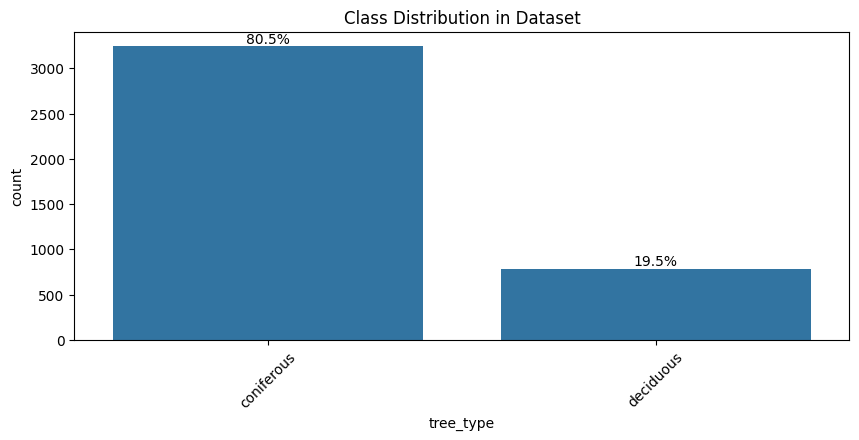

In [23]:
# Basic class distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x=target_variable, order=df[target_variable].value_counts().index)
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=45)

# Add percentage labels
total = len(df)
for p in plt.gca().patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='bottom')

In [ ]:
mi_scores = mutual_info_classif(df[features], df[target_variable])

KeyError: 'text_column'